In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Dropout,Conv2D,BatchNormalization, MaxPooling2D, Input
from tensorflow.keras.callbacks import Callback, EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv(r"C:\Users\dell\Documents\fer2013.csv\fer2013.csv")


In [3]:
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [5]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear',
3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

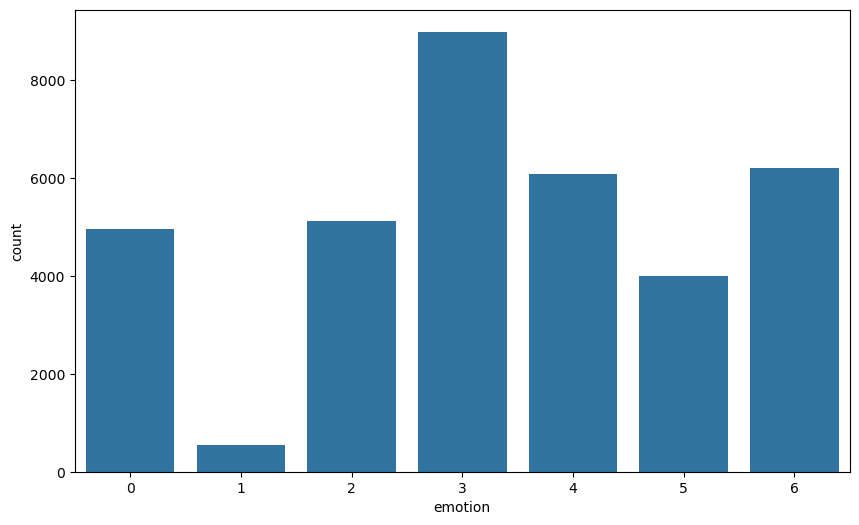

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotion', data=df)


In [7]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

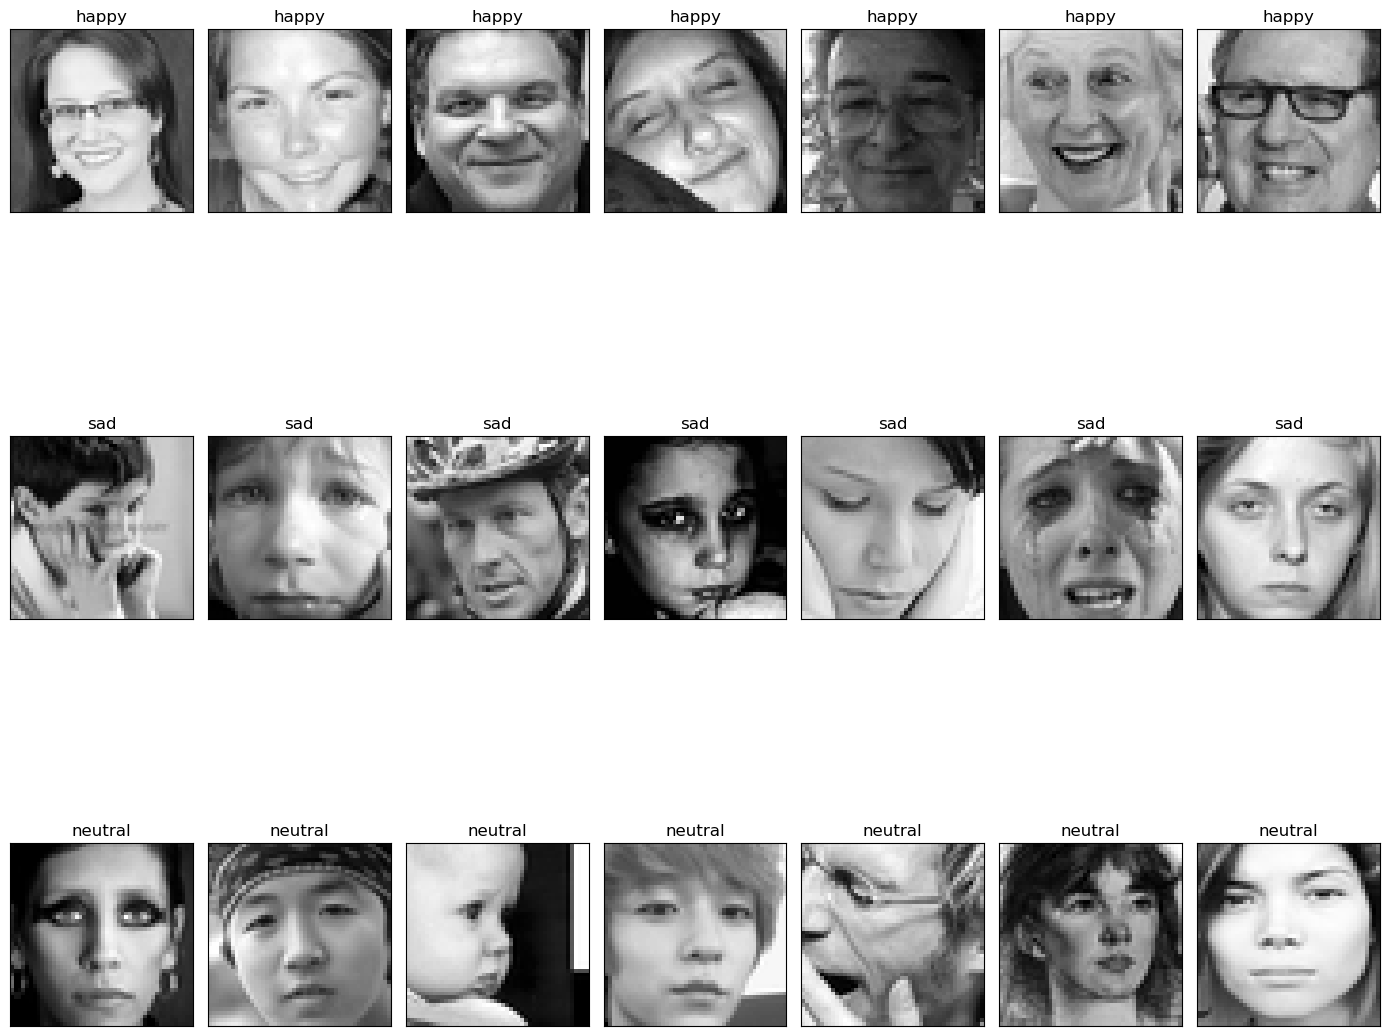

New shape: (21264, 3)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Defined Mapping
emotion_label_to_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

# Filtered the dataframe OUTSIDE the loop
INTERESTED_LABELS = [3, 4, 6]
df_filtered = df[df.emotion.isin(INTERESTED_LABELS)].copy()

# Setfing up the figure
fig = plt.figure(figsize=(14, 14))
k = 0

# Loop through the filtered data
for label in sorted(df_filtered.emotion.unique()):
    # Get the first 7 examples for each of the 3 labels
    for j in range(7):
        k += 1
        # Extract pixel data
        px = df_filtered[df_filtered.emotion == label].pixels.iloc[j] # Use j to get distinct images
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        
        # Create subplot
        ax = plt.subplot(3, 7, k) # 3 rows (for 3 labels), 7 columns
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])

plt.tight_layout()
plt.show()

print("New shape:", df_filtered.shape)


In [9]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48,
48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)
img_array.shape
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = to_categorical(img_labels)
img_labels.shape
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
X_train, X_valid, y_train, y_valid = train_test_split(img_array,
img_labels, shuffle=True, stratify=img_labels, test_size=0.1,
random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


((32298, 48, 48, 1), (3589, 48, 48, 1), (32298, 7), (3589, 7))

Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/50


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2010 - loss: 2.4959
Epoch 1: val_accuracy improved from None to 0.31513, saving model to best_model.keras
504/504 ━━━━━━━━━━━━━━━━━━━━ 1656s 3s/step - accuracy: 0.2336 - loss: 2.1386 - val_accuracy: 0.3151 - val_loss: 1.7672 - learning_rate: 0.0010
Epoch 2/50
  1/504 ━━━━━━━━━━━━━━━━━━━━ 23:50 3s/step - accuracy: 0.2969 - loss: 1.8632

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.31513 to 0.31624, saving model to best_model.keras
504/504 ━━━━━━━━━━━━━━━━━━━━ 50s 94ms/step - accuracy: 0.2969 - loss: 1.8632 - val_accuracy: 0.3162 - val_loss: 1.7656 - learning_rate: 0.0010
Epoch 3/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3126 - loss: 1.7351
Epoch 3: val_accuracy improved from 0.31624 to 0.41460, saving model to best_model.keras
504/504 ━━━━━━━━━━━━━━━━━━━━ 1670s 3s/step - accuracy: 0.3350 - loss: 1.6834 - val_accuracy: 0.4146 - val_loss: 1.5187 - learning_rate: 0.0010
Epoch 4/50
  1/504 ━━━━━━━━━━━━━━━━━━━━ 27:24 3s/step - accuracy: 0.4375 - loss: 1.4798
Epoch 4: val_accuracy improved from 0.41460 to 0.42435, saving model to best_model.keras
504/504 ━━━━━━━━━━━━━━━━━━━━ 86s 165ms/step - accuracy: 0.4375 - loss: 1.4798 - val_accuracy: 0.4244 - val_loss: 1.5092 - learning_rate: 0.0010
Epoch 5/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3975 - loss: 1.5484
Epoch 5: val_accuracy improved from 0.42435 

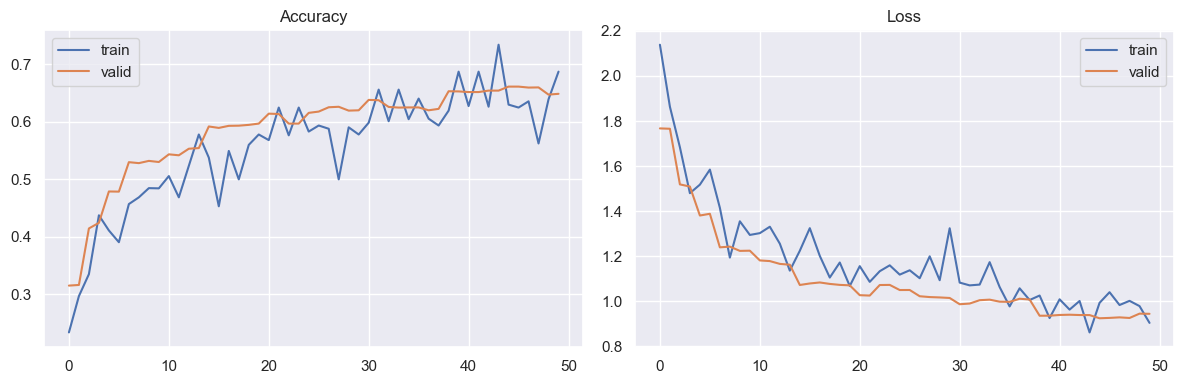

In [13]:

img_width = X_train.shape[1]   # 48
img_height = X_train.shape[2]  # 48
img_depth = X_train.shape[3]   # 1
num_classes = y_train.shape[1] # 3 (Happy, Sad, Neutral)


def build_net(optim):
    net = Sequential(name='DCNN')
    
    # Input Layer 
    net.add(Input(shape=(img_width, img_height, img_depth)))
    
    
    net.add(Conv2D(filters=64, kernel_size=(5,5), activation='elu', padding='same', 
                   kernel_initializer='he_normal', name='conv2d_1'))
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(Conv2D(filters=64, kernel_size=(5,5), activation='elu', padding='same', 
                   kernel_initializer='he_normal', name='conv2d_2'))
    net.add(BatchNormalization(name='batchnorm_2'))
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    
    net.add(Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', 
                   kernel_initializer='he_normal', name='conv2d_3'))
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', 
                   kernel_initializer='he_normal', name='conv2d_4'))
    net.add(BatchNormalization(name='batchnorm_4'))
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    
    net.add(Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', 
                   kernel_initializer='he_normal', name='conv2d_5'))
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', 
                   kernel_initializer='he_normal', name='conv2d_6'))
    net.add(BatchNormalization(name='batchnorm_6'))
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    # Fully Connected Block
    net.add(Flatten(name='flatten'))
    net.add(Dense(128, activation='elu', kernel_initializer='he_normal', name='dense_1'))
    net.add(BatchNormalization(name='batchnorm_7'))
    net.add(Dropout(0.6, name='dropout_4'))

    # Output Layer
    net.add(Dense(num_classes, activation='softmax', name='out_layer'))

    net.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    net.summary()
    return net

# --- CALLBACKS & OPTIMIZERS ---
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks_list = [early_stopping, lr_scheduler, checkpoint]

optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    optimizers.Adam(learning_rate=0.001),
]

# --- TRAINING EXECUTION ---
batch_size = 64 # Increased for faster CPU training
epochs = 50     # Reduced for practicality

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

model = build_net(optims[0])

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler, checkpoint],
    
)

# ---SAVING & PLOTTING ---
# Note: to_yaml() is deprecated; using to_json()
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save("model.h5")

sns.set()
fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
plt.title('Accuracy')

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
plt.title('Loss')

plt.tight_layout()
plt.show()

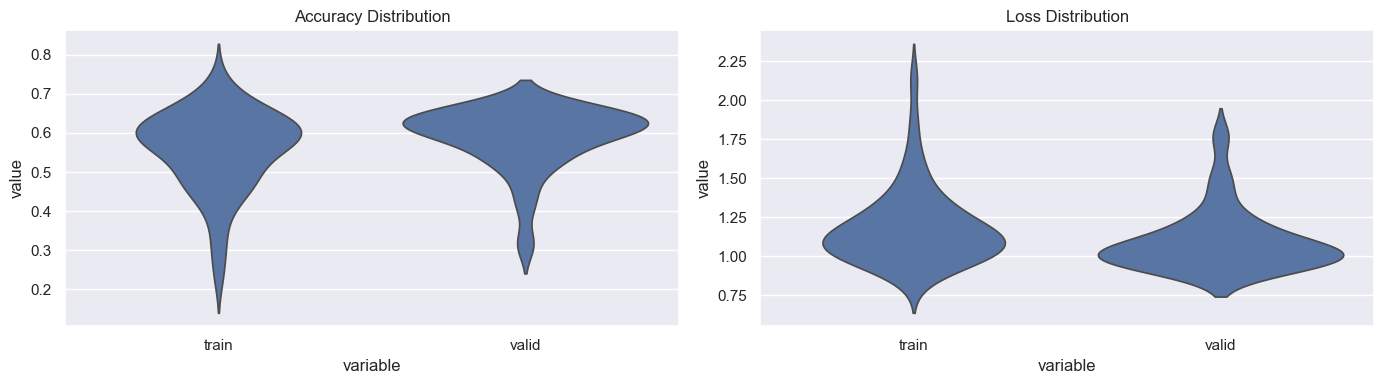

In [25]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})
fig = plt.figure(0, (14, 4))
# Plot 1: Accuracy
ax1 = plt.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), inner=None)
plt.title('Accuracy Distribution')

# Plot 2: Loss
ax2 = plt.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), inner=None)
plt.title('Loss Distribution')
plt.tight_layout()
plt.savefig('performance_dist.png')
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 296ms/step


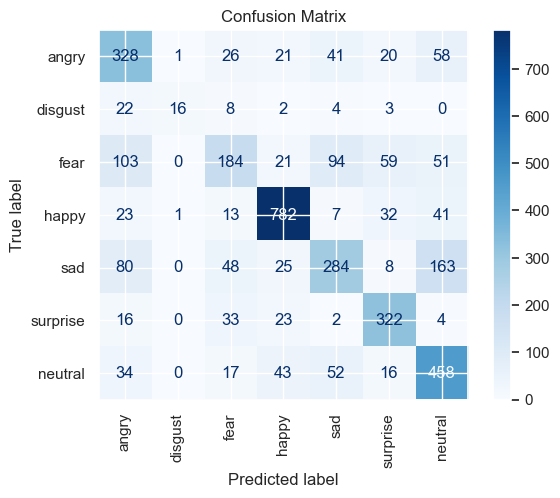

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
y_true = np.argmax(y_valid, axis=1)
cm = confusion_matrix(y_true, yhat_valid)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

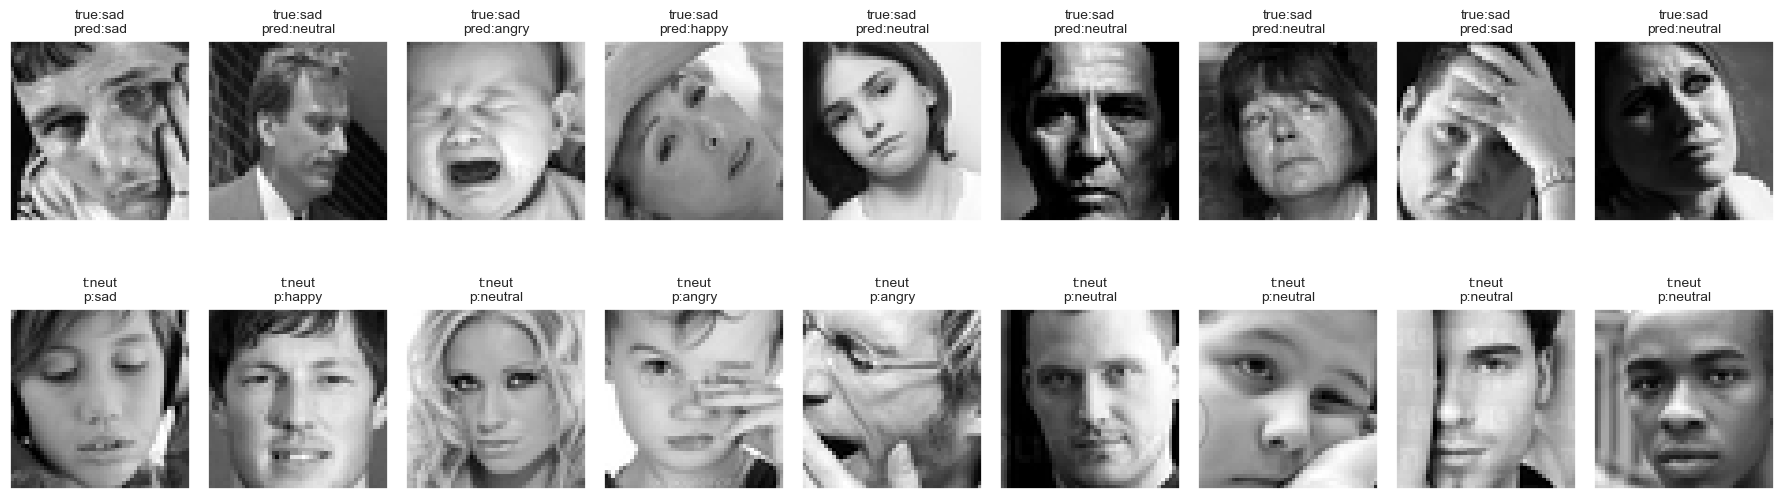

In [41]:
mapper = {
    0: "angry", 
    1: "disgust", 
    2: "fear", 
    3: "happy", 
    4: "sad", 
    5: "surprise", 
    6: "neutral"
}
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 4]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 6]==1)[0], size=9)

fig = plt.figure(1, (18, 6))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
    # Row 1: Sad Images
    ax = plt.subplot(2, 9, i+1)
    sample_img_sad = X_valid[sadidx,:,:,0]
    ax.imshow(sample_img_sad, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([])
    pred_sad = np.argmax(model.predict(sample_img_sad.reshape(1,48,48,1), verbose=0), axis=1)[0]
    ax.set_title(f"true:sad\npred:{mapper[pred_sad]}", fontsize=10)
    ax = plt.subplot(2, 9, i+10)
    sample_img_neu = X_valid[neuidx,:,:,0]
    ax.imshow(sample_img_neu, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([])
    pred_neu = np.argmax(model.predict(sample_img_neu.reshape(1,48,48,1), verbose=0), axis=1)[0]
    ax.set_title(f"t:neut\np:{mapper[pred_neu]}", fontsize=10)

plt.tight_layout()
plt.show()